# **GEREKLİ KÜTÜPHANELERİN İMPORT İŞLEMLERİ**

In [1]:
# KEŞİFSEL VERİ ANALİZİ (EDA) KÜTÜPHANELERİ
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Import Matplotlib for creating visualizations
import seaborn as sns # Import Seaborn for advanced data visualization

# VERİ ÖN İŞLEME KÜTÜOHANELERİ
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from sklearn for encoding categorical features
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder from sklearn for encoding categorical features
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and test sets

# MODEL OLUŞTURMA KÜTÜPHANELERİ
from sklearn.cluster import KMeans  # Import KMeans for K-Means clustering
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression for classification

# MODEL DEĞERLENDİRME KÜTÜPHANELERİ
from sklearn.metrics import classification_report, accuracy_score  # Import metrics for model evaluation
from sklearn.model_selection import cross_val_score # Import cross-validation score function
from sklearn.pipeline import make_pipeline # Import pipeline creation utility

# UYARILARI KAPATMA KÜTÜPHANESİ
import warnings # Import warnings module to handle warning messages
warnings.filterwarnings("ignore") # Ignore any warning messages to keep the output clean

In [2]:
df = pd.read_csv('/kaggle/input/crash-dataset-2016-2023/crash_data.csv') # Load the crash_data.csv file into a DataFrame

# **📊🔍 EDA - Exploratory Data Analysis (Keşifsel Veri Analizi)**

Bu kısım, veri kümesinin temel özelliklerini anlamak ve daha ileri analizler için gerekli bilgileri sağlamak amacıyla gerçekleştirilmiş olan Exploratory Data Analysis (EDA) sürecini içermektedir. EDA, veri setinin yapısını, özelliklerini ve ilişkilerini incelemek için kullanılan önemli bir adımdır. Bu süreç, veri temizliği, keşifsel analiz ve görselleştirme aşamalarını kapsar.

In [3]:
df.columns # Display the column names of the DataFrame

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None) # pandas setting for seeing all coulmns
df.head() # Show the first 5 rows of the DataFrame

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,NaN,NaN,OPPOSITE DIRECTION SIDESWIPE,CLOUDY,NaN,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,ACC015E9-08A4-4856-866E-0004005F986C,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,4E492574-893B-4EB1-ADCA-53FDD633D6C4,FUNCTIONAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,South,South,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/2023 12:36:00 PM,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,NaN,NaN,BICYCLIST,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NONE DETECTED,76C65B60-90BF-4706-B78A-D277E9DC2E44,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,6D16232C-4E1E-49A6-B3A2-7FDEF7E506F2,FUNCTIONAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,West,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/2023 12:00:00 PM,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,NaN,GAITHERSBURG,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,B27B0A06-056C-4963-BCE7-2AE19BAD7061,No,SUSPECTED MINOR INJURY,NaN,NOT DISTRACTED,MD,82ED056D-33FA-44A5-AA2B-8DCE653FA03C,FUNCTIONAL,SIX OCLOCK,SIX OCLOCK,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,South,South,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/05/2023 09:07:00 PM,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,NaN,59A2A81B-B4F7-4FCE-B8C4-A2EC656A177D,No,NO APPARENT INJURY,"ANIMAL, N/A",NOT DISTRACTED,MD,3CD099CA-F5FF-4174-B184-02BCF2C89934,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,POLICE VEHICLE/NON EMERGENCY,MOVING CONSTANT SPEED,South,South,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/2023 12:40:00 AM,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,NaN,NaN,NaN,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,YIELD SIGN,NONE DETECTED,NaN,BACFA4BA-C75D-46A4-A181-1B4C0C3F8592,Yes,NO APPARENT INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,64940511-7ACF-4F66-9A1B-5F476A46C2A5,DISABLING,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,North,20,No,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"


In [5]:
df.info() # Display concise summary of the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   172105 non-null  object 
 1   Local Case Number               172105 non-null  object 
 2   Agency Name                     172105 non-null  object 
 3   ACRS Report Type                172105 non-null  object 
 4   Crash Date/Time                 172105 non-null  object 
 5   Route Type                      155132 non-null  object 
 6   Road Name                       156168 non-null  object 
 7   Cross-Street Type               155099 non-null  object 
 8   Cross-Street Name               156154 non-null  object 
 9   Off-Road Description            15935 non-null   object 
 10  Municipality                    19126 non-null   object 
 11  Related Non-Motorist            5463 non-null    object 
 12  Collision Type  

In [6]:
df.describe  # Generate descriptive statistics for numerical columns in the DataFrame

<bound method NDFrame.describe of        Report Number Local Case Number                Agency Name  \
0        MCP3170003V         240000438   Montgomery County Police   
1        MCP3254003K         230072050   Montgomery County Police   
2         EJ7887003Q         230074270  Gaithersburg Police Depar   
3        MCP2674004J         230064598   Montgomery County Police   
4        MCP25280008         230067019   Montgomery County Police   
...              ...               ...                        ...   
172100    DM8338000C          16010228  Takoma Park Police Depart   
172101   MCP1182001S         170519976   Montgomery County Police   
172102   MCP1453008X         200046217   Montgomery County Police   
172103   MCP2568000M         190056701   Montgomery County Police   
172104   MCP1048000P          15003337   Montgomery County Police   

             ACRS Report Type         Crash Date/Time        Route Type  \
0       Property Damage Crash  01/03/2024 02:55:00 PM         

**---------- Hedef Değişkenin Dağılımı ----------**

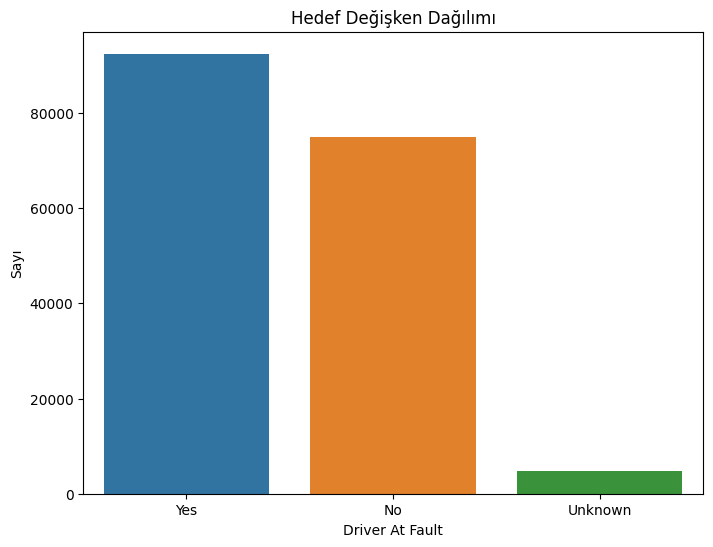

In [7]:
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.countplot(x='Driver At Fault', data=df)  # Create a count plot for the 'Driver At Fault' column
plt.title('Hedef Değişken Dağılımı')  # Set the title of the plot
plt.xlabel('Driver At Fault')  # Label for the x-axis
plt.ylabel('Sayı')  # Label for the y-axis
plt.show()  # Display the plot


**EKSİK VERİ**

**---------- Kolonlardaki Eksik Veri Dağılımı ----------**

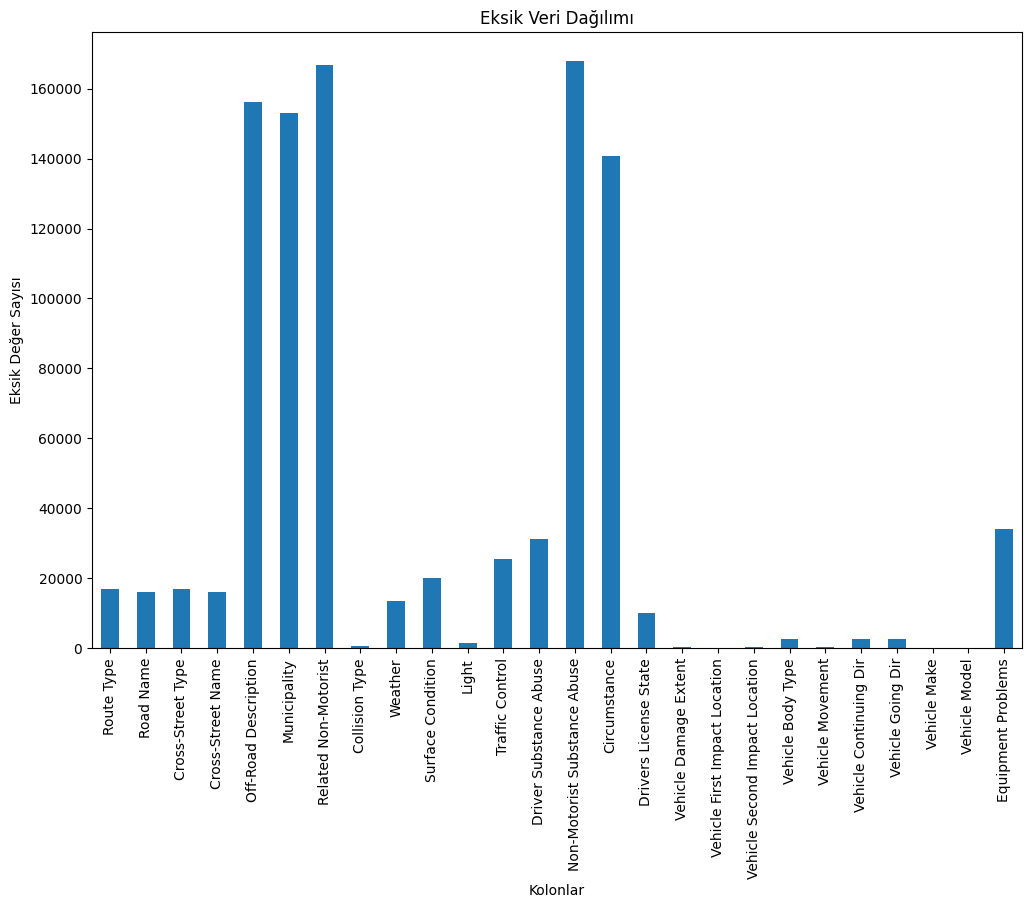

In [8]:
missing_data = df.isnull().sum()  # Calculate the number of missing values in each column
missing_data = missing_data[missing_data > 0]  # Filter columns with missing values

plt.figure(figsize=(12, 8))  # Set the figure size for the plot
missing_data.plot(kind='bar')  # Create a bar plot of missing data
plt.title('Eksik Veri Dağılımı')  # Set the title of the plot
plt.xlabel('Kolonlar')  # Label for the x-axis
plt.ylabel('Eksik Değer Sayısı')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


**---------- Kolonlardaki Eksik Veri Sayısı ----------**

In [9]:
null_counts = df.isnull().sum()  # Calculate the number of missing values (null) in each column
null_counts  # Display the count of missing values for each column


Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16973
Road Name                          15937
Cross-Street Type                  17006
Cross-Street Name                  15951
Off-Road Description              156170
Municipality                      152979
Related Non-Motorist              166642
Collision Type                       585
Weather                            13354
Surface Condition                  20118
Light                               1445
Traffic Control                    25469
Driver Substance Abuse             31324
Non-Motorist Substance Abuse      167788
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      140746
Driver Distracted By                   0
Drivers License 

**---------- Kolonlardaki Eksik Veri Oranları ----------**

In [10]:
missing_ratios = df.isnull().mean()  # Calculate the ratio of missing values in each column
missing_ratios  # Display the ratio of missing values for each column


Report Number                     0.000000
Local Case Number                 0.000000
Agency Name                       0.000000
ACRS Report Type                  0.000000
Crash Date/Time                   0.000000
Route Type                        0.098620
Road Name                         0.092600
Cross-Street Type                 0.098812
Cross-Street Name                 0.092682
Off-Road Description              0.907411
Municipality                      0.888870
Related Non-Motorist              0.968258
Collision Type                    0.003399
Weather                           0.077592
Surface Condition                 0.116894
Light                             0.008396
Traffic Control                   0.147985
Driver Substance Abuse            0.182005
Non-Motorist Substance Abuse      0.974916
Person ID                         0.000000
Driver At Fault                   0.000000
Injury Severity                   0.000000
Circumstance                      0.817791
Driver Dist

**---------- Kolonlardaki Eşsiz Veri Değer Sayıları ----------**

In [11]:
for column in df.columns:  # Iterate through each column in the DataFrame
    num_unique = df[column].nunique()  # Get the number of unique values in the column
    print(f"Column: {column}")  # Print the column name
    print(f"Number of unique values: {num_unique}")  # Print the number of unique values in the column
    print("-" * 40)  # Print a separator line for readability


Column: Report Number
Number of unique values: 96854
----------------------------------------
Column: Local Case Number
Number of unique values: 108783
----------------------------------------
Column: Agency Name
Number of unique values: 10
----------------------------------------
Column: ACRS Report Type
Number of unique values: 3
----------------------------------------
Column: Crash Date/Time
Number of unique values: 94499
----------------------------------------
Column: Route Type
Number of unique values: 10
----------------------------------------
Column: Road Name
Number of unique values: 3803
----------------------------------------
Column: Cross-Street Type
Number of unique values: 10
----------------------------------------
Column: Cross-Street Name
Number of unique values: 6697
----------------------------------------
Column: Off-Road Description
Number of unique values: 11302
----------------------------------------
Column: Municipality
Number of unique values: 20
----------

# **🧹🔄 VERİ ÖN İŞLEME(GENEL)**
Bu bölümde, ham verilerin analiz için hazır hale getirilmesini sağlayan veri ön işleme adımlarını inceleyeceğiz. Temizlik, dönüştürme ve düzenleme işlemleriyle verilerin kalitesini artırarak modelleme sürecine hazırlayacağız

---------- **Removing Unnecessary Columns / Gereksiz Sütunları Çıkarma İşlemi** ---------- 

Veri hazırlamadan gereksiz sütunları çıkarmak için şu kriterlere dikkat edilebilir:

*  Ayrık Değer Sayısı Çok Fazla Olanlar: Çok sayıda benzersiz değer içeren sütunlar, modeli yavaşlatabilir. Örneğin, Road Name veya Agency Name sütunları.

*  Düşük Varyanslı Sütunlar: Az farklı değer içeren veya çoğunlukla tek bir kategoriye sahip sütunlar model üzerinde etkili olmayabilir. Örneğin, Route Type sütununda tek bir değere yoğunlaşma.

*  Etki Analizi Yapılmamış Sütunlar: Hedef değişkenle zayıf ilişkisi olan sütunlar çıkarılabilir.









In [12]:
df = df.drop(columns=[  # Drop specified columns from the DataFrame
    'Report Number',
    'Local Case Number',
    'Person ID',
    'Vehicle ID',
    'Latitude',
    'Longitude',
    'Road Name',
    'Agency Name',
    'Route Type',
    'Location',
    'Cross-Street Name',
    'Crash Date/Time',
    'Vehicle Make',
    'Vehicle Model',
    'Off-Road Description',
    'Circumstance'


])

In [13]:
# We run the code above again and see the remaining column information.
for column in df.columns:
    num_unique = df[column].nunique()
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique}")
    print("-" * 40)


Column: ACRS Report Type
Number of unique values: 3
----------------------------------------
Column: Cross-Street Type
Number of unique values: 10
----------------------------------------
Column: Municipality
Number of unique values: 20
----------------------------------------
Column: Related Non-Motorist
Number of unique values: 12
----------------------------------------
Column: Collision Type
Number of unique values: 18
----------------------------------------
Column: Weather
Number of unique values: 12
----------------------------------------
Column: Surface Condition
Number of unique values: 11
----------------------------------------
Column: Light
Number of unique values: 8
----------------------------------------
Column: Traffic Control
Number of unique values: 11
----------------------------------------
Column: Driver Substance Abuse
Number of unique values: 11
----------------------------------------
Column: Non-Motorist Substance Abuse
Number of unique values: 15
------------

**---------- Eksik Verilerin Doldurulması ----------**


Tamamen Boş (Null) Olan Sütunlar:

Off-Road Description (%90.7), Municipality (%88.9), Related Non-Motorist (%96.8), Circumstance (%81.8).Bu sütunlar çok yüksek oranda null değer içeriyor. Bu sütunları tamamen çıkarmalıyız, çünkü büyük çoğunluğu eksik.

Orta Derecede Eksik Veri İçeren Sütunlar:

Route Type (9.7%), Road Name (9.1%), Cross-Street Type (9.8%), Cross-Street Name (9.3%), Weather (7.8%), Surface Condition (11.7%), Traffic Control (14.8%), Driver Substance Abuse (18.2%), Drivers License State (5.8%), Vehicle Damage Extent (0.2%), Vehicle First Impact Location (0.1%), Vehicle Second Impact Location (0.15%), Vehicle Body Type (1.5%), Vehicle Movement (0.2%), Vehicle Continuing Dir (1.6%), Vehicle Going Dir (1.6%), Vehicle Make (0.01%), Vehicle Model (0.04%), Equipment Problems (19.8%).

Null Değer İçermeyen Sütunlar:

Bu sütunlardaki eksik değerleri en sık tekrar eden (mod) ile doldurmak mantıklı olacaktır.Agency Name (0.0%), ACRS Report Type (0.0%), Crash Date/Time (0.0%), Driver At Fault (0.0%), Injury Severity (0.0%), Driver Distracted By (0.0%), Speed Limit (0.0%), Driverless Vehicle (0.0%), Parked Vehicle (0.0%), Vehicle Year (0.0%).

Bu sütunlar eksik veri içermiyor değiştirmeye gerek yok.

In [14]:
# Set the threshold ratio for missing data
threshold = 0.20

# Calculate missing data ratios after dropping columns
missing_ratios = df.isnull().sum() / len(df)  # Compute the proportion of missing values for each column

# Fill columns with missing data below the threshold ratio with their mode
cols_to_fill = missing_ratios[missing_ratios < threshold].index  # Identify columns with missing data below the threshold
for col in cols_to_fill:
    mode_value = df[col].mode()[0]  # Find the mode (most frequent value) of the column
    df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

# Drop columns with missing data above or equal to the threshold ratio
cols_to_drop = missing_ratios[missing_ratios >= threshold].index  # Identify columns with missing data above or equal to the threshold
df.drop(columns=cols_to_drop, inplace=True)  # Drop the identified columns


In [15]:
df.head() # Display the first few rows of the DataFrame after handling missing data

,ACRS Report Type,Cross-Street Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Equipment Problems
0,Property Damage Crash,County,OPPOSITE DIRECTION SIDESWIPE,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,MD,FUNCTIONAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,South,South,0,No,No,2017,NO MISUSE
1,Injury Crash,County,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,NO APPARENT INJURY,NOT DISTRACTED,MD,FUNCTIONAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,West,35,No,No,2010,NO MISUSE
2,Injury Crash,Municipality,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,SUSPECTED MINOR INJURY,NOT DISTRACTED,MD,FUNCTIONAL,SIX OCLOCK,SIX OCLOCK,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,South,South,35,No,No,2021,NO MISUSE
3,Property Damage Crash,County,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,No,NO APPARENT INJURY,NOT DISTRACTED,MD,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,POLICE VEHICLE/NON EMERGENCY,MOVING CONSTANT SPEED,South,South,40,No,No,2019,NO MISUSE
4,Property Damage Crash,Maryland (State),SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,YIELD SIGN,NONE DETECTED,Yes,NO APPARENT INJURY,NOT DISTRACTED,MD,DISABLING,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,North,20,No,No,2014,NO MISUSE


**Buraya kadar gözetimli ve gözetimsiz öğrenme işlemleri ortak. Buradan sonra gözetimli ve gözetimsiz öğrenme için yapılacak işlemleri iki kısımda inceleyeceğim.**

# **🧹🔄 VERİ ÖN İŞLEME(GÖZETİMSİZ ÖĞRENME)**

# Encoding

**Label Encoding**

In [16]:
# List of ordinal columns to apply Label Encoding
ordinal_columns = ['Injury Severity', 'Vehicle Damage Extent']

le = LabelEncoder()  # Initialize the LabelEncoder
for column in ordinal_columns:
    df[column] = le.fit_transform(df[column].astype(str))  # Convert each ordinal column to numeric labels


**One-Hot Encoding**

In [17]:
# List of nominal columns to apply OneHot Encoding
nominal_columns = ['ACRS Report Type', 'Cross-Street Type', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Driver At Fault',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Equipment Problems']

# Apply OneHot Encoding to nominal columns and drop the first level to avoid multicollinearity
df_unsupervised = pd.get_dummies(df, columns=nominal_columns, drop_first=True)


#  Standardization 

In [18]:
scaler = StandardScaler()  # Initialize the StandardScaler
X_scaled = scaler.fit_transform(df_unsupervised)  # Fit and transform the entire dataset to standardize features


# **📈⚙️ ALGORİTMA SEÇİMİ & HİPERPARAMETRE OPTİMİZASYONU (GÖZETİMSİZ ÖĞRENME)**
Gözetimsiz öğrenmede algoritma seçimi, verilerin doğasına ve hedeflenen çıkarıma bağlıdır. Algoritmaların performansını maksimize etmek için doğru hiperparametrelerin seçimi kritik bir rol oynar. Kümeleme ve boyut indirgeme gibi tekniklerde algoritma özelliklerine uygun hiperparametre optimizasyonu, modelin doğruluğunu artırır ve veri dağılımlarını daha iyi anlamamıza olanak tanır.Standardization

In [19]:
# Initialize KMeans with 3 clusters and a fixed random seed for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # Fit the model and predict cluster assignments for the entire dataset


# **🧠💡 MODEL DEĞERLENDİRME (GÖZETİMSİZ ÖĞRENME)**
Gözetimsiz öğrenme modellerinde değerlendirme, genellikle modelin veri içindeki yapıları ve desenleri ne kadar iyi yakaladığını anlamak üzerine odaklanır. Kümeler arası ayrım, içsel tutarlılık ve veri yeniden yapılandırma gibi kriterler, modelin başarısını ölçmek için kullanılır. Uygulamada, sonuçların görselleştirilmesi ve çeşitli metriklerle değerlendirilmesi, modelin performansını objektif bir şekilde analiz etmeye yardımcı olur.

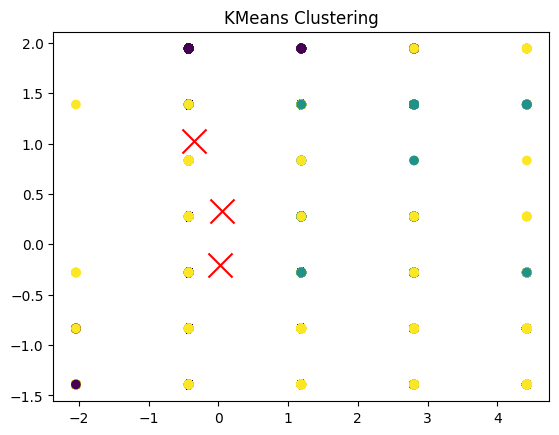

In [20]:
# Scatter plot of the first two scaled features, colored by cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')

# Calculate cluster centers from the fitted KMeans model
centers = kmeans.cluster_centers_

# Scatter plot of cluster centers with red 'x' markers
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='x')  # Show cluster centers
plt.title('KMeans Clustering')  # Set the title of the plot
plt.show()  # Display the plot


# **🧹🔄 VERİ ÖN İŞLEME(GÖZETİMSİZ ÖĞRENME)**

# Encoding

Burada gözetimsiz öğrenme için tekrardan birkaç farklılık içeren encoding işlemleri uygulanmaktadır. Çünkü verimizi etiketleme kısmında target değişkene encoding işlemi yapılmayacaktır.

In [21]:
# List of nominal columns to apply OneHot Encoding
nominal_columns = ['ACRS Report Type', 'Cross-Street Type', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Equipment Problems']

# Apply OneHot Encoding to nominal columns and drop the first level to avoid multicollinearity
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)


# Veriyi Bölme ve Etiketleme İşlemi

In [22]:
# Define the target column
target_column = 'Driver At Fault'

# Separate features and target variable
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardization

In [23]:
# Create a scaler to standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)  # Standardize the training data

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)  # Standardize the test data


# **📈⚙️ ALGORİTMA SEÇİMİ & HİPERPARAMETRE OPTİMİZASYONU (GÖZETİMLİ ÖĞRENME)**
Gözetimli öğrenme sürecinde algoritma seçimi, problemin doğasına ve verinin özelliklerine göre yapılır. Doğrusal regresyondan destek vektör makinelerine kadar çeşitli algoritmalar, farklı veri setleri için uygun olabilir. Hiperparametre optimizasyonu, seçilen algoritmanın performansını artırmak için kritik bir adımdır. Grid search, random search ve Bayesian optimizasyon gibi yöntemler kullanılarak, modelin hiperparametreleri ayarlanarak en iyi sonuçlar elde edilir. Bu süreç, modelin genelleme yeteneğini ve doğruluğunu maksimize eder.

In [24]:
# Create the logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate and print the results
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))  # Print the accuracy score

Doğruluk Skoru: 0.8697887917259812


# **🧠💡 MODEL DEĞERLENDİRME (GÖZETİMLİ ÖĞRENME)**
Gözetimli öğrenme modellerinde değerlendirme, modelin doğruluğunu ve genel performansını ölçmek için çeşitli metrikler kullanır. Sınıflandırma problemlerinde doğruluk, F1 skoru, ROC eğrisi ve AUC gibi metrikler, modelin tahminlerinin ne kadar doğru olduğunu gösterir. Regresyon problemlerinde ise RMSE, MAE ve R² gibi ölçütler kullanılarak modelin tahmin başarısı değerlendirilir. Bu metrikler, modelin gerçek dünyadaki performansını anlamak ve gerekli iyileştirmeleri yapmak için kritik öneme sahiptir.


**---------- Cross Validation (Çapraz Doğrulama) Sonuçları ----------**

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


# Çapraz doğrulama uygulama 
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını yazdırma
print(f"Çapraz Doğrulama Sonuçları: {cv_scores}")
print(f"Ortalama Doğruluk: {cv_scores.mean()}")
print(f"Standart Sapma: {cv_scores.std()}")


Çapraz Doğrulama Sonuçları: [0.87075571 0.87006573 0.87562189 0.87144569 0.87031522]
Ortalama Doğruluk: 0.8716408491500433
Standart Sapma: 0.0020449220815253123


**---------- Farklı Model Başarı Metrikleri ----------**

In [26]:
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))  # Print the classification report

Sınıflandırma Raporu:
               precision    recall  f1-score   support

          No       0.86      0.88      0.87     14895
     Unknown       0.45      0.02      0.05       955
         Yes       0.88      0.90      0.89     18571

    accuracy                           0.87     34421
   macro avg       0.73      0.60      0.60     34421
weighted avg       0.86      0.87      0.86     34421

